## Scaling : Test data

### working for the distance based models : scaling on df_test

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../..')

In [3]:
from src.data.load_data import load_data, get_info, get_shape, get_nan, save_data
from src.featured_engineering.plot_features import plot_graphs, plot_graphs_post_scaling
from src.featured_engineering.outliers import iqr_score, adjust_values
from src.featured_engineering.scalers import scale_feature

In [4]:
#-----------setting up the data path
df_path = '../../../data/intermidiate/test.csv'
df_path

'../../../data/intermidiate/test.csv'

In [5]:
#-------------loading the data and some initial checks
df = load_data(df_path)
df.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


In [6]:
#--------------null values
nan_values = get_nan(df)
nan_values

Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [8]:
#-----------get_info
df_info = get_info(df)
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Source                     2671 non-null   int64
 1   Destination                2671 non-null   int64
 2   Total_Stops                2671 non-null   int64
 3   Airline_IndiGo             2671 non-null   int64
 4   Airline_Jet Airways        2671 non-null   int64
 5   Airline_other              2671 non-null   int64
 6   Additional_Info_Some info  2671 non-null   int64
 7   Date_of_Journey_day        2671 non-null   int64
 8   Date_of_Journey_month      2671 non-null   int64
 9   Dep_Time_hour              2671 non-null   int64
 10  Dep_Time_minute            2671 non-null   int64
 11  Arrival_Time_hour          2671 non-null   int64
 12  Arrival_Time_minute        2671 non-null   int64
 13  Duration_in_hours          2671 non-null   int64
dtypes: int64(14)
memory usag

In [9]:
#-----------------making the df_copy in order to cross verify the comparison after scaling the data
df_copy = df.copy()
df_copy.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,6,6,17,30,4,25,10
1,1,1,1,1,0,0,0,12,5,6,20,10,20,4
2,0,0,1,0,1,0,1,21,5,19,15,19,0,23
3,0,0,1,0,0,1,0,21,5,8,0,21,0,13
4,2,2,0,0,0,1,0,24,6,23,55,2,45,2


### =============== working with scalers =================

In [10]:
#--------------first applying on the rest of the numerical columns except the price feature
cols_for_scaler = [
    'Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 
    'Duration_in_hours'
    ]
cols_for_scaler

['Date_of_Journey_day',
 'Date_of_Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_in_hours']

Feature : Date_of_Journey_day


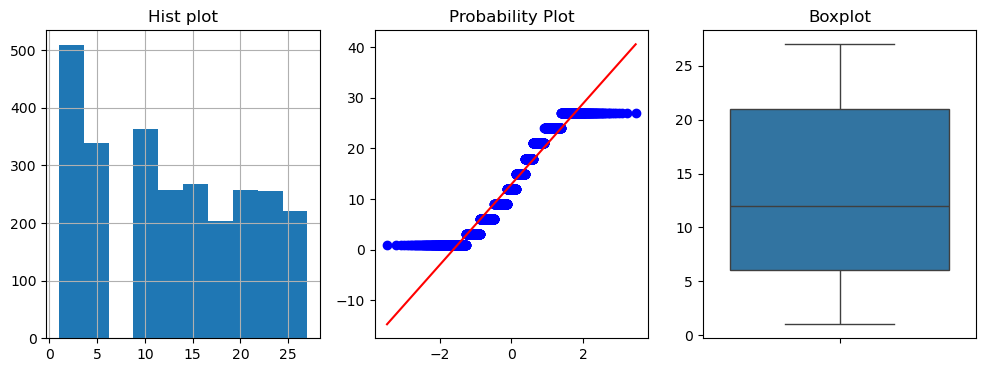

Feature : Date_of_Journey_month


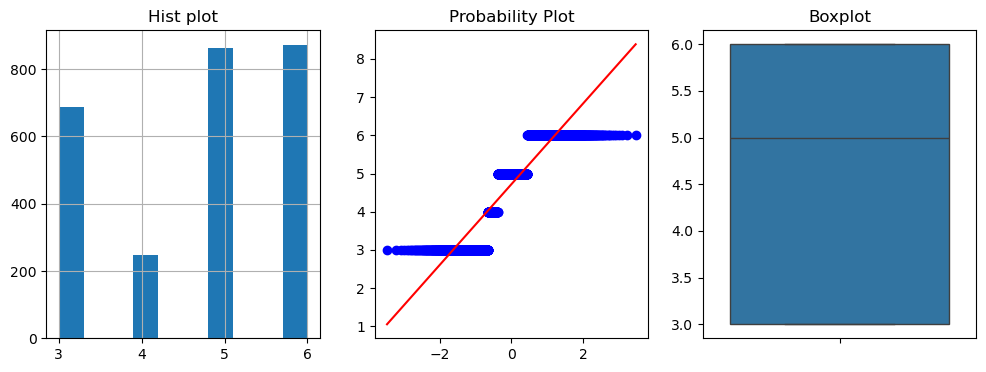

Feature : Dep_Time_hour


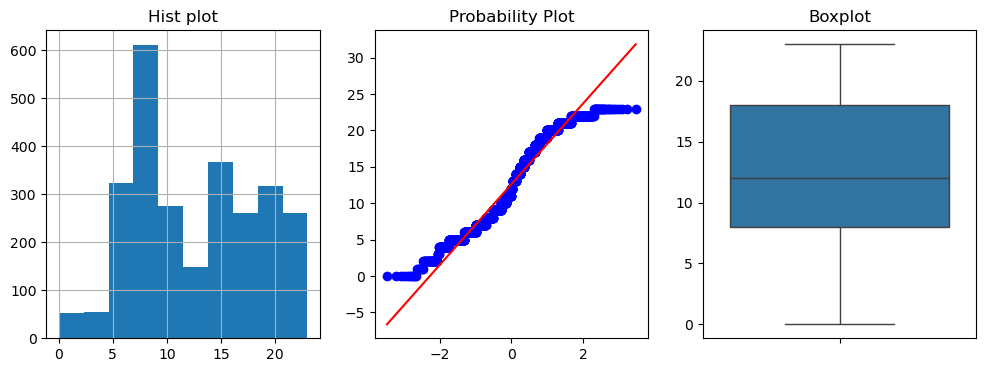

Feature : Dep_Time_minute


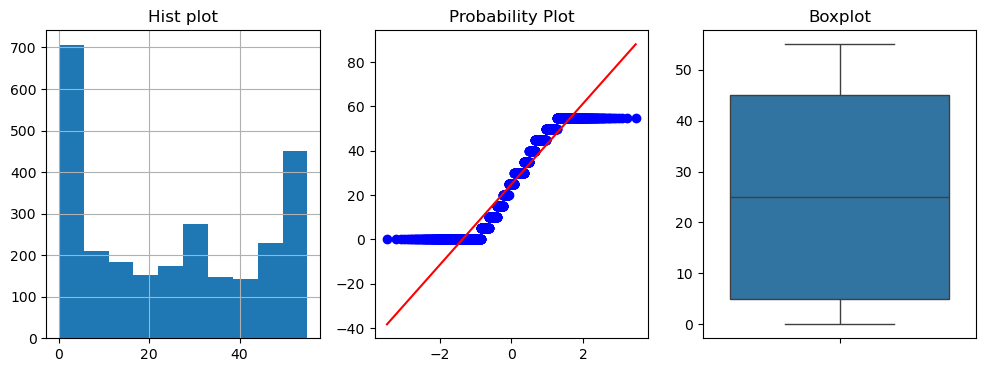

Feature : Arrival_Time_hour


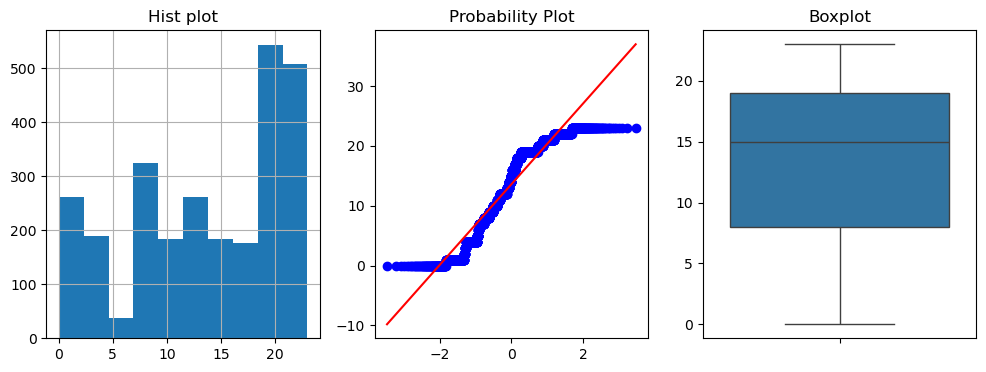

Feature : Arrival_Time_minute


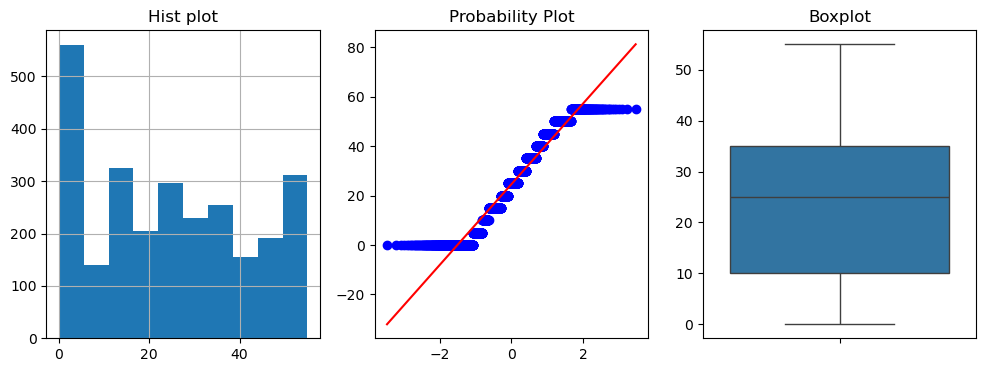

Feature : Duration_in_hours


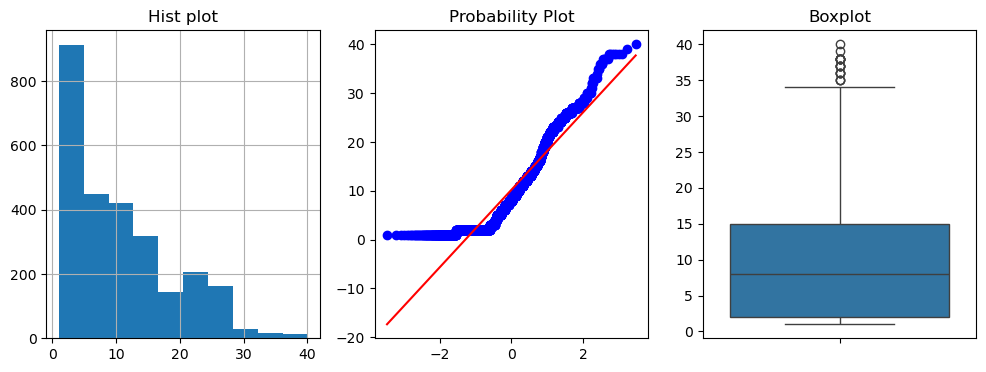

In [11]:
#---------------plotting the features
for feature in cols_for_scaler : 
    print(f"Feature : {feature}")
    plot_graphs(df, feature)

In [12]:
#----------------preloading the scaler
scaler_path = '../../../scalers/scaler_for_rest.pkl'
scaler_path

'../../../scalers/scaler_for_rest.pkl'

In [13]:
#--------------scaling the features
scale_feature(df, cols_for_scaler, scaler_path)

In [14]:
#-----------------df.head() for the check
df.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


Feature : Date_of_Journey_day


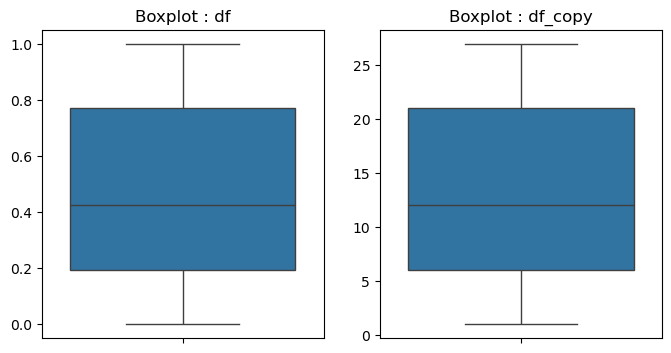

Feature : Date_of_Journey_month


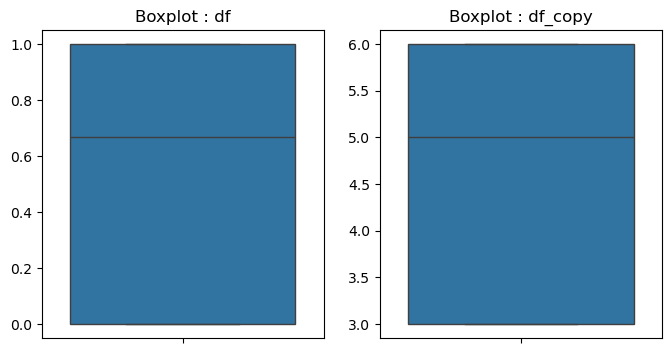

Feature : Dep_Time_hour


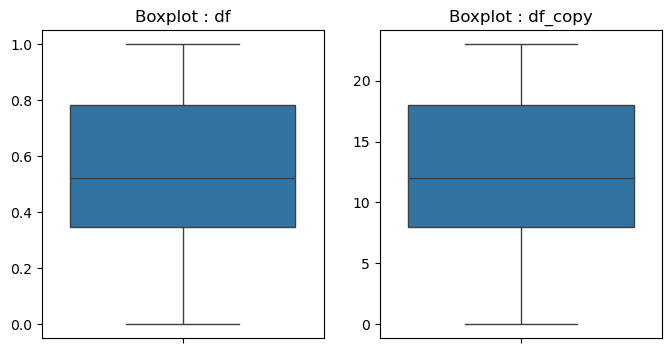

Feature : Dep_Time_minute


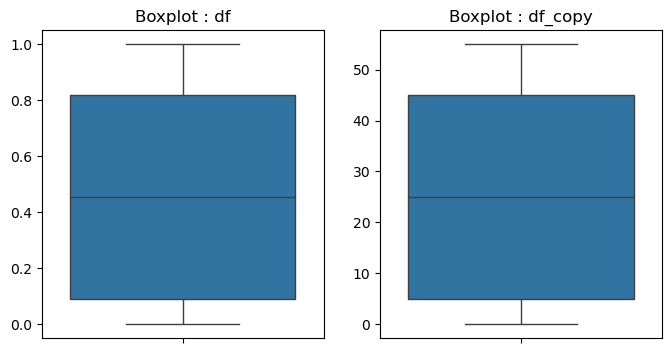

Feature : Arrival_Time_hour


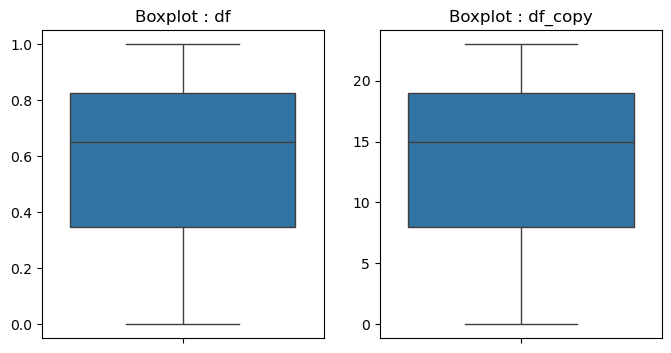

Feature : Arrival_Time_minute


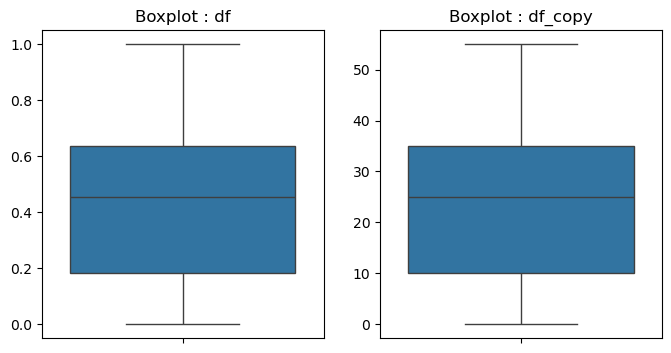

Feature : Duration_in_hours


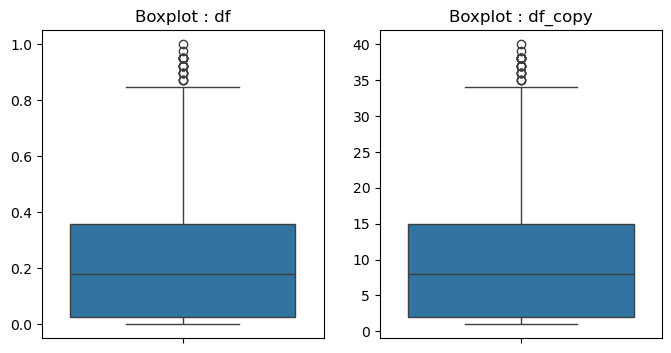

In [16]:
#----------------plotting the features for the comparison
for features in cols_for_scaler : 
    print(f"Feature : {features}")
    plot_graphs_post_scaling(df, df_copy, features)

##### --------------- completetion ---------------

In [17]:
#--------------saving the data 
df_test_distance_path = '../../../data/preprocessed/distance/test.csv'
save_data(df, df_test_distance_path)

In [18]:
#----------------veryfying if everything went well
df = load_data(df_test_distance_path)
df.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641
